# Enclosing Radius of Rips Complex

In this notebook, we investigate the enclosing radius optimization for Rips Complexes

In [1]:
import bats
import numpy as np
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
import time

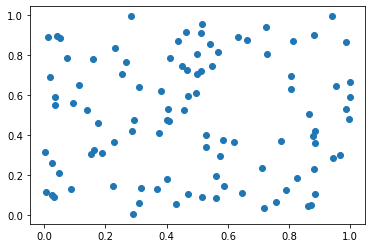

In [26]:
# generate a data set
n = 100
p = 2
data = np.random.rand(n, p)
plt.scatter(data[:,0], data[:,1]);

In [27]:
# compute pairwise distances
D = distance.squareform(distance.pdist(data))

In [28]:
# Rips complex for full metric space
t0 = time.monotonic()
F = bats.LightRipsFiltration(bats.Matrix(D), np.inf, 2)
t1 = time.monotonic()
print("construction time: {} sec.".format(t1-t0))

# compute with F2 coefficents
t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("reduction time: {} sec.".format(t1-t0))

construction time: 0.09170726500451565 sec.
reduction time: 0.7253811160044279 sec.


Now, we compute the enclosing radius of the finite metric space

In [29]:
r_enc = np.min(np.max(D, axis=0))
print("enclosing radius = {}".format(r_enc))
r_enc = bats.enclosing_radius(bats.Matrix(D))
print("enclosing radius = {}".format(r_enc))

enclosing radius = 0.6759464079293375
enclosing radius = 0.6759464079293375


In [30]:
# Rips complex up to enclosing radius
t0 = time.monotonic()
F_enc = bats.LightRipsFiltration(bats.Matrix(D), r_enc, 2)
t1 = time.monotonic()
print("construction time: {} sec.".format(t1-t0))

# compute with F2 coefficents
t0 = time.monotonic()
R_enc = bats.reduce(F_enc, bats.F2())
t1 = time.monotonic()
print("reduction time: {} sec.".format(t1-t0))

construction time: 0.06489976801094599 sec.
reduction time: 0.263848296017386 sec.


Let's compare the number of simplices in each filtration

In [31]:
print("dim\tinf\tr_enc")
for k in range(F.maxdim() + 1):
    print("{}\t{}\t{}".format(k, F.ncells(k), F_enc.ncells(k)))
print("--------------------------")
# print("\t{}\t{}".format(F.ncells(), F2.ncells()))

dim	inf	r_enc
0	100	100
1	4950	3429
2	161700	64577
--------------------------


The savings are primarily in the number of 2-simplices

# Updates

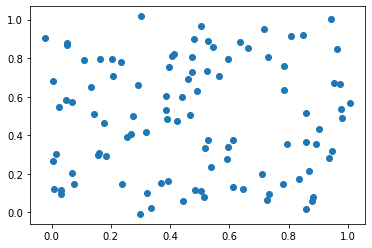

In [32]:
data2 = data + 0.02 * np.random.randn(n,p)
plt.scatter(data2[:,0], data2[:,1]);

In [33]:
# compute pairwise distances
D2 = distance.squareform(distance.pdist(data2))

In [34]:
# Rips complex for full metric space
t0 = time.monotonic()
F2 = bats.LightRipsFiltration(bats.Matrix(D2), np.inf, 2)
t1 = time.monotonic()
print("construction time: {} sec.".format(t1-t0))

t0 = time.monotonic()
update_info = bats.UpdateInfoLightFiltration(F, F2)
t1 = time.monotonic()
print("compute UpdateInfo time: {} sec.".format(t1-t0))

t0 = time.monotonic()
R.update_filtration_general(update_info)
t1 = time.monotonic()
print("apply update time: {} sec.".format(t1-t0))

construction time: 0.11893748000147752 sec.
compute UpdateInfo time: 0.17407521200948395 sec.
apply update time: 0.10864161100471392 sec.


In [35]:
r_enc2 = np.min(np.max(D2, axis=0))

t0 = time.monotonic()
F_enc2 = bats.LightRipsFiltration(bats.Matrix(D2), r_enc2, 2)
t1 = time.monotonic()
print("construction time: {} sec.".format(t1-t0))

t0 = time.monotonic()
update_info_enc = bats.UpdateInfoLightFiltration(F_enc, F_enc2)
t1 = time.monotonic()
print("compute UpdateInfo time: {} sec.".format(t1-t0))

t0 = time.monotonic()
R_enc.update_filtration_general(update_info_enc)
t1 = time.monotonic()
print("apply update time: {} sec.".format(t1-t0))

construction time: 0.04204494401346892 sec.
compute UpdateInfo time: 0.08396302899927832 sec.
apply update time: 0.10169626100105233 sec.
